<a href="https://colab.research.google.com/github/tarushsingh09/Image-Compression-with-Singular-Value-Decomposition-SVD-/blob/main/E21CSEU0974_LAB_8_INTELLIGENT_MODEL_DESIGN_TARUSH_SINGH_EB_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TARUSH SINGH
#E21CSEU0974
#EB-13
#INTELLIGENT MODEL DESIGN(CSET-225) LAB 8

#Lab Assignment -8
#Title: Exploring Image Compression with Singular Value Decomposition (SVD)
#Objective: The objective of this lab assignment is to introduce students to the concept of Singular Value Decomposition (SVD) and its application in image compression and reconstruction.

#IMPORTING NECESSARY LIBRARIES

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from skimage.transform import rescale, resize

#LOADING AN IMAGE FROM THE SKIMAGE

In [35]:
# Load an example image
original_image = data.camera()
print(original_image)

[[200 200 200 ... 189 190 190]
 [200 199 199 ... 190 190 190]
 [199 199 199 ... 190 190 190]
 ...
 [ 25  25  27 ... 139 122 147]
 [ 25  25  26 ... 158 141 168]
 [ 25  25  27 ... 151 152 149]]


#DISPLAYING THE IMAGE

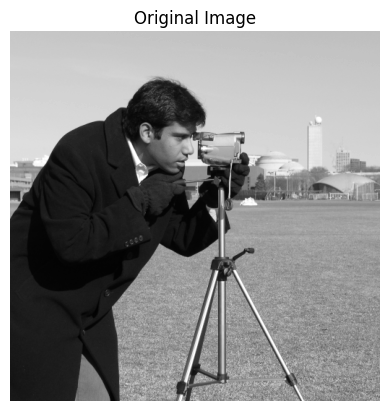

In [36]:
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#Perform Singular Value Decomposition (SVD)

In [37]:
def svd_compression(image, k):
    U, S, Vt = np.linalg.svd(image, full_matrices=False)
    compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    return compressed_image

#Choose compression level (k)

In [38]:
k = 50  # You can experiment with different values for k
compressed_image = svd_compression(original_image, k)

#DISPLAYING COMPRESSED IMAGE

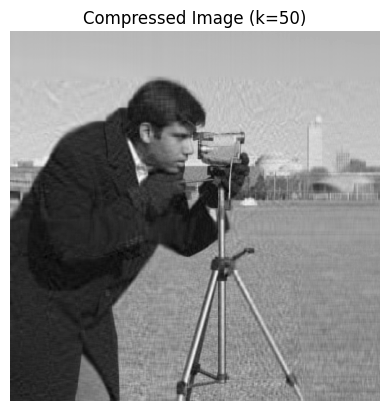

In [39]:
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image (k={k})')
plt.axis('off')
plt.show()

#Comparing original and compressed images:

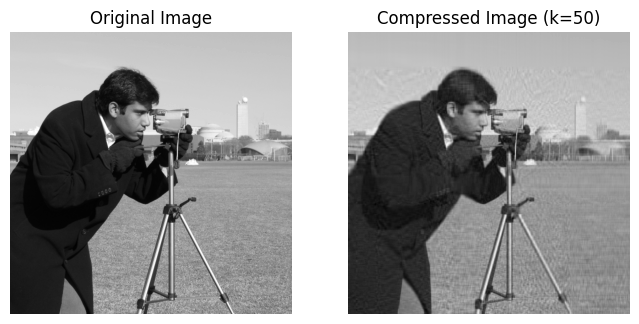

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(compressed_image, cmap='gray')
axes[1].set_title(f'Compressed Image (k={k})')
axes[1].axis('off')

plt.show()

#Now compressing and displaying 5 images:  

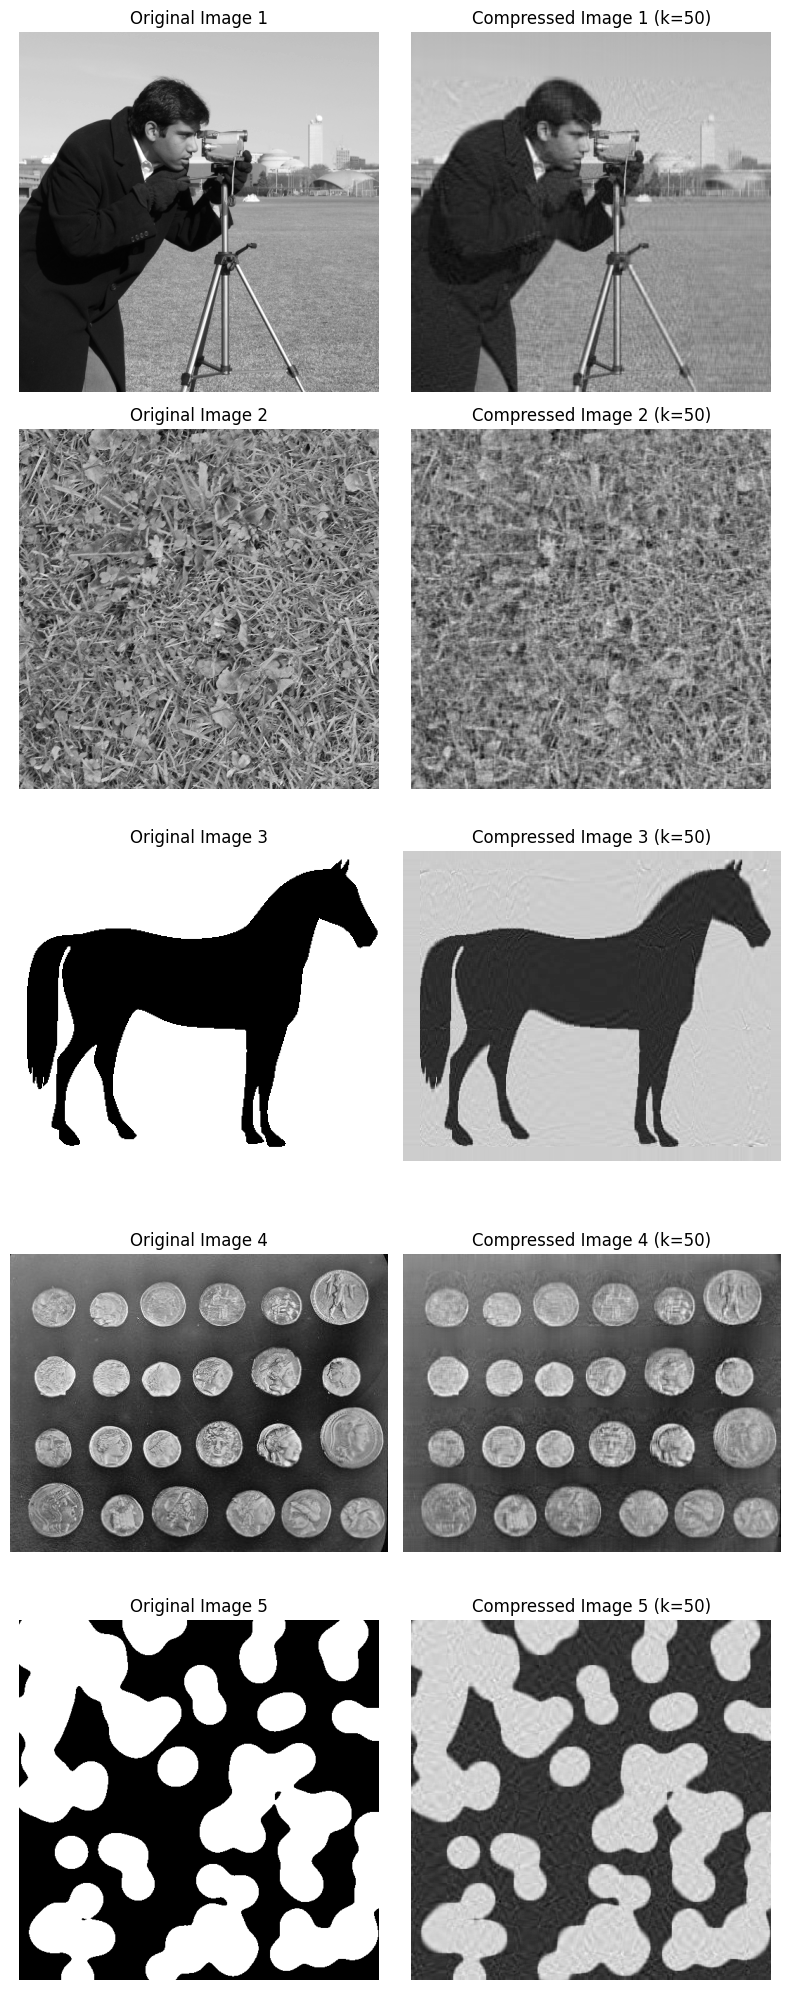

In [41]:
# Define the svd_compression_color function (same as before)
def svd_compression_color(image, k):
    if image.ndim == 2:
        # Grayscale image
        U, S, Vt = np.linalg.svd(image, full_matrices=False)
        compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    elif image.ndim == 3:
        # RGB image
        compressed_channels = []
        for channel in range(image.shape[2]):
            U, S, Vt = np.linalg.svd(image[:, :, channel], full_matrices=False)
            compressed_channel = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
            compressed_channels.append(compressed_channel)
        compressed_image = np.stack(compressed_channels, axis=-1)
    else:
        raise ValueError("Unsupported image format")

    return compressed_image
#Using a sample image from skimage
image_list = [data.camera(), data.grass(), data.horse(), data.coins(), data.binary_blobs()]

#Set a larger figure size for better visualization
fig, axes = plt.subplots(len(image_list), 2, figsize=(8, 4*len(image_list)))

#Display original images
for idx, original_image in enumerate(image_list):
    axes[idx, 0].imshow(original_image, cmap='gray')
    axes[idx, 0].set_title(f'Original Image {idx+1}')
    axes[idx, 0].axis('off')

#Display compressed images
for idx, original_image in enumerate(image_list):
    compressed_image = svd_compression_color(original_image, k)
    axes[idx, 1].imshow(compressed_image, cmap='gray')
    axes[idx, 1].set_title(f'Compressed Image {idx+1} (k={k})')
    axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()